### 📁 Internship Project – Coding Samurai

This project explores the Titanic passenger dataset to discover patterns that influenced survival. It is part of my Data Science internship and includes

- Data cleaning
- Handling missing values
- Visual analysis
- Feature correlation
- Insight extraction

The goal is to practice real-world data exploration and storytelling using data.


In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set visualization aesthetics
sns.set(style='whitegrid')

In [2]:
# Load Dataset
df = pd.read_csv("titanic.csv")

In [3]:
# View first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 891 rows and 12 columns.


In [5]:
# Preview column names
print("Column names:", df.columns.to_list())

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
# Data type and non-null values info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Descriptive stats for numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Count of missing values per column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- The `Cabin` column has too many missing values (687), so it may be dropped.
- The `Age` column has 177 missing values and can be filled with the median.
- The `Embarked` column has only 2 missing values, so rows with missing `Embarked` can be safely removed.

In [9]:
# Dropping 'Cabin' column due to excessive missing values
df.drop(columns=['Cabin'], inplace=True)

In [10]:
# Dropping rows where 'Embarked' is missing
df.dropna(subset=['Embarked'], inplace=True)

In [11]:
# Filling missing 'Age' values with the median of the column
df['Age'].fillna(df['Age'].median(), inplace=True)

In [12]:
# Checking again for any missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- All missing values have now been handled. The dataset is clean and ready for visualization.

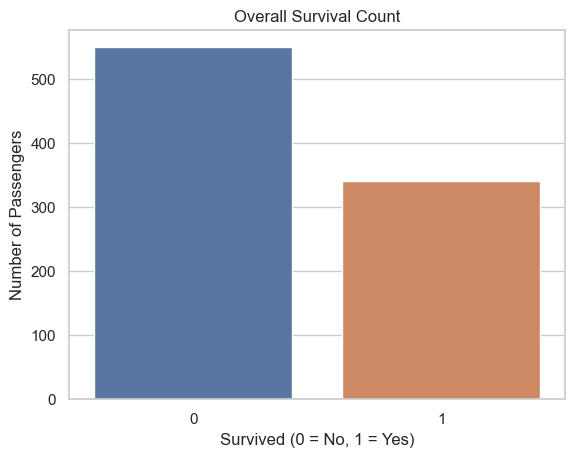

In [13]:
# Visualizing total number of survivors vs non-survivors
sns.countplot(x='Survived', data=df)
plt.title("Overall Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

- The majority of passengers did not survive.
- This highlights the severity of the disaster.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

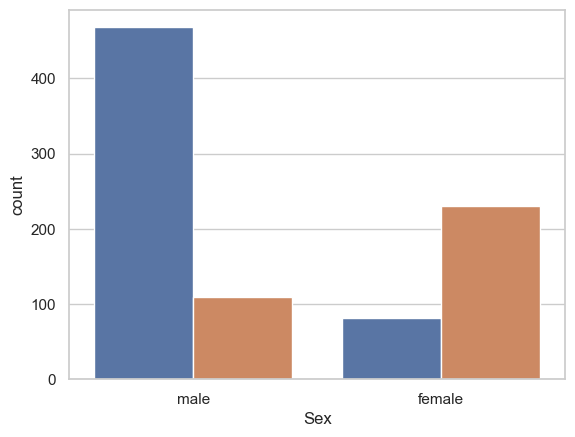

In [14]:
# Comparing survival count across genders
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()

In [15]:
# Map 0 and 1 to meaningful labels
df['SurvivalStatus'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

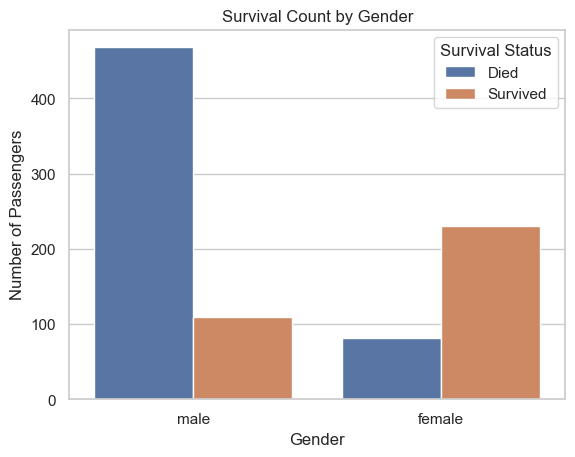

In [16]:
# Now plot using the human-readable labels instead of raw ints
sns.countplot(x='Sex', hue='SurvivalStatus', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title='Survival Status')
plt.show()

# Fixing a Visualization Bug: Converting Survival Status to Human-Readable Labels
While trying to create a plot comparing survival by gender using Seaborn, I ran into an error. The issue was with how the `Survived` column (which contains 0s and 1s) was being used as the `hue` in the plot.

Technically, 0 = "Died" and 1 = "Survived", but since the values are integers, Seaborn/Matplotlib got confused when trying to create the plot's legend, which caused an error.

To fix this, I created a new column called `SurvivalStatus` 
df['SurvivalStatus'] = df['Survived'].map({0: 'Died', 1: 'Survived'})

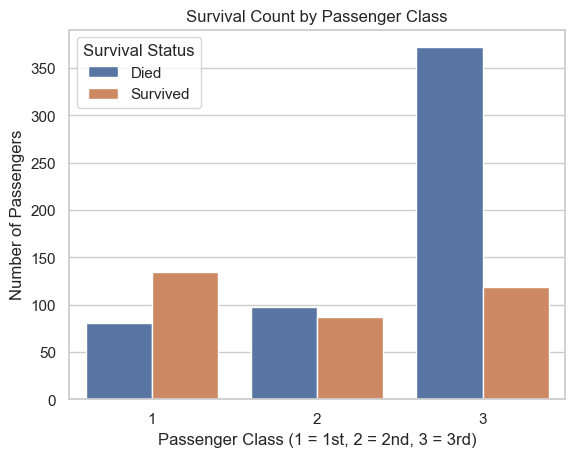

In [21]:
sns.countplot(x='Pclass', hue='SurvivalStatus', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survival Status")
plt.show()

## Class vs Survival

This chart shows how class affected survival:

- **1st class** passengers had the **highest survival rate**.
- Those in **3rd class** were the most likely to die.
- This was likely due to a combination of **proximity to lifeboats**, **crew attention**, and **socio-economic status**.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


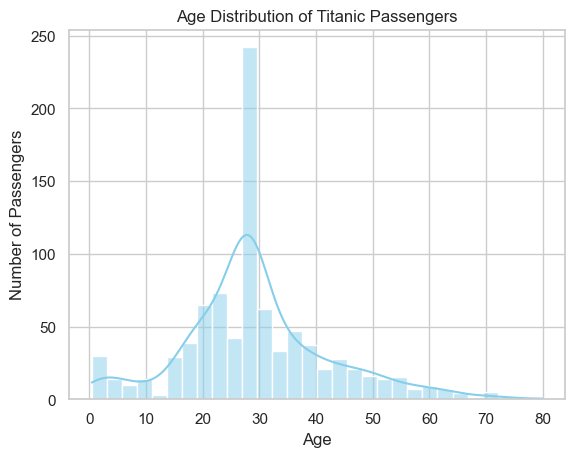

In [22]:
# Visualizing the distribution of passenger ages
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution of Titanic Passengers")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()

# Age Distribution of Passengers

This plot helps us understand how old most passengers were.

- The **majority of passengers** were between **20 to 40 years old**.
- There were also a number of children and older adults aboard.
- The distribution is slightly right-skewed, showing more younger adults on board than elderly passengers.


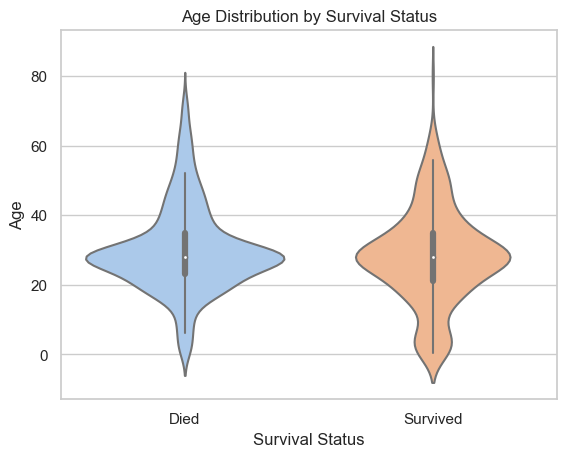

In [23]:
# Violin plot to show age distribution by survival status
sns.violinplot(x='SurvivalStatus', y='Age', data=df, palette='pastel')
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survival Status")
plt.ylabel("Age")
plt.show()

##  Age vs Survival (Violin Plot)

This plot gives a deeper look at age ranges of those who survived vs those who didn’t.

- **Children** were more likely to survive — you can see the bulk of their age range is shifted higher in the "Survived" group.
- The **non-survivors** mostly fall into the adult (20–40) age range.
- Elderly survival was low across the board.

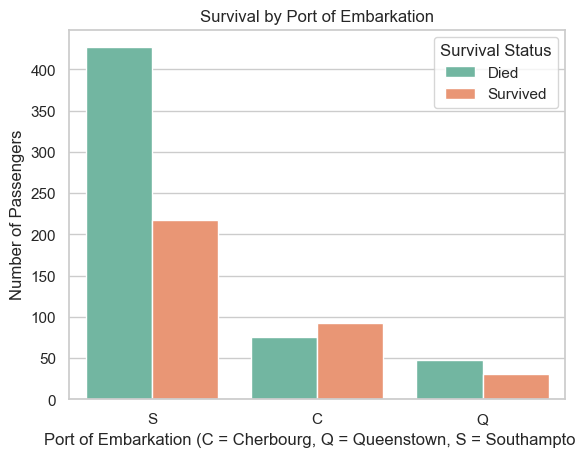

In [25]:
# Compare survival across embarkation ports
sns.countplot(x='Embarked', hue='SurvivalStatus', data=df, palette='Set2')
plt.title("Survival by Port of Embarkation")
plt.xlabel("Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Number of Passengers")
plt.legend(title="Survival Status")
plt.show()

##  Port of Embarkation vs Survival

- Passengers who boarded at **Cherbourg (C)** had the **highest survival rate**.
- The majority of passengers boarded from **Southampton (S)**, and many of them did not survive.
- This pattern may relate to class distribution — passengers from Cherbourg may have had more 1st class tickets.

In [27]:
# Total family members = siblings/spouses + parents/children + self
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

##  Feature: FamilySize

This new column counts how many family members were traveling with the passenger.

- It's the sum of `SibSp` (siblings/spouse) + `Parch` (parents/children) + 1 (the passenger).
- This helps us check if being with family improved survival chances.

In [28]:
# IsAlone = 1 if FamilySize == 1, else 0
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

##  Feature: IsAlone

This binary column indicates whether the passenger was traveling alone.

- If `FamilySize` is 1, then `IsAlone` is 1 (true).
- Otherwise, it’s 0 — the passenger had family aboard.

This can reveal whether being alone affected survival.

In [29]:
# Extract title using regex from the 'Name' column
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with 'Other'
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

# Group similar titles together
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

##  Feature: Title

Passenger names contain their titles (like Mr., Mrs., Miss), which can tell us:
- Their **gender**
- Possibly their **age**
- Their **social status**

We extracted titles from the `Name` column and grouped rare ones as `'Other'`.  
This helps improve interpretability and is especially useful for classification tasks.

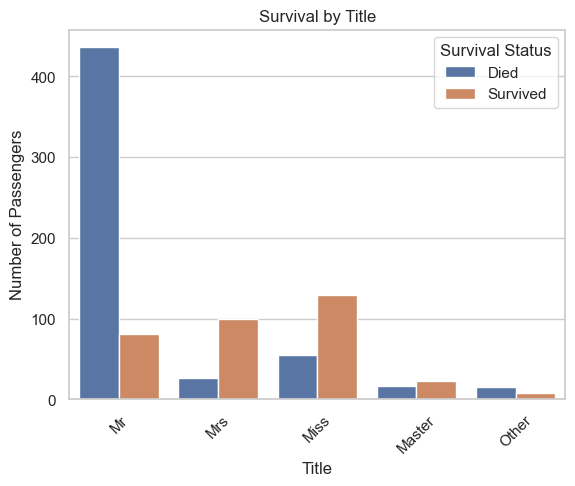

In [30]:
sns.countplot(x='Title', hue='SurvivalStatus', data=df)
plt.title("Survival by Title")
plt.xlabel("Title")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.legend(title="Survival Status")
plt.show()

## 🎓 Title vs Survival

- Titles like **Mrs.** and **Miss** had higher survival rates.
- **Mr.** had the highest count but low survival.
- Rare titles (grouped under "Other") showed varied results.

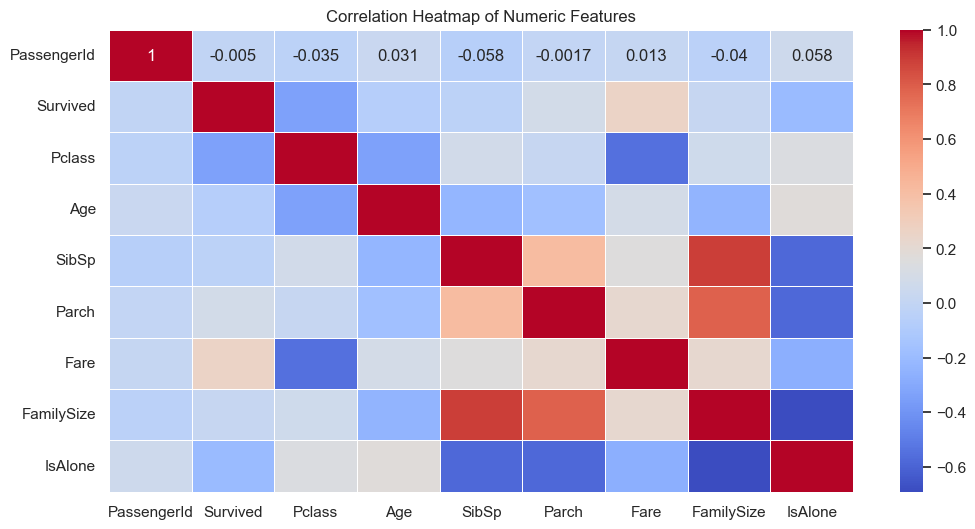

In [32]:
# Now for correlation, Selecting only numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## Correlation Heatmap

This heatmap shows how strongly numerical features relate to each other and to `Survived`.

- `Fare` has a moderate **positive correlation** with survival → Higher fares = higher survival (likely due to class).
- `Pclass` has a **negative correlation** with survival → 3rd class passengers were less likely to survive.
- `IsAlone` is **negatively correlated**, meaning people who were alone had lower chances of survival.
- `FamilySize` and `Parch` have slight positive correlation, supporting the idea that being with family helped.

#  Final Conclusion of the Internship Task

From this exploratory data analysis, we discovered some meaningful survival patterns on the Titanic:

- **Gender mattered**: Females had a significantly higher survival rate.
- **Class mattered**: 1st class passengers had much better odds of surviving.
- **Age mattered**: Children had higher survival chances; adults in the 20–40 range were most vulnerable.
- **Embarkation mattered**: Cherbourg (C) passengers survived more often, likely due to class.
- **Family mattered**: People traveling alone were less likely to survive.
- **Title helped reveal patterns** in gender, age, and status — which affected survival too.

These patterns make sense historically and also show how raw data can tell stories when visualized and explored properly.